## Import Library

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

## Import Data

In [3]:
df_trans = pd.read_csv('dh_transactions.csv')
df_product = pd.read_csv('dh_product_lookup.csv')
df_casual = pd.read_csv('dh_causal_lookup.csv')
df_store = pd.read_csv('dh_store_lookup.csv')

In [4]:
for df in [df_trans, df_product, df_casual, df_store]:
    display(df.head(3))
    display(df.info())
    
    # Missing data
    for i in df.columns:
        null_rate = df[i].isna().sum() / len(df) * 100 
        if null_rate > 0 :
            print("{} null rate: {}%".format(i,round(null_rate,2)))

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB


None

,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


None

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   upc           351372 non-null  int64 
 1   store         351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature_desc  351372 non-null  object
 4   display_desc  351372 non-null  object
 5   geography     351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB


None

,store,store_zip_code
0,1,37865
1,2,30084
2,3,30039


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   store           387 non-null    int64
 1   store_zip_code  387 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB


None

## Clean

In [5]:
df = df_trans.merge(df_store, on='store', how='outer')
df = df.merge(df_product, on='upc', how='outer')
# df = df.merge(df_casual, on=['upc', 'store', 'week', 'geography'], how='outer')

In [6]:
display(df.head(3))
display(df.info())

# Missing data
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,store_zip_code,product_description,commodity,brand,product_size
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
1,7680850106,1.60,2,1518,2,1,503106,244,5111,4,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
2,7680850106,1.19,1,1517,2,4,18851,244,43533,23,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197681 entries, 0 to 5197680
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
 11  store_zip_code       int64  
 12  product_description  object 
 13  commodity            object 
 14  brand                object 
 15  product_size         object 
dtypes: float64(1), int64(11), object(4)
memory usage: 674.1+ MB


None

In [7]:
# convert column type
for c in ['upc', 'time_of_transaction', 'geography', 'household', 'store', 'basket', 'coupon', 'store_zip_code']:
    df[c] = df[c].apply(str)

# drop duplicate
df = df.drop_duplicates()

In [8]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,dollar_sales,units,week,day
count,5197681.00,5197681.00,5197681.00,5197681.00
mean,1.76,1.20,53.22,369.54
std,1.13,0.57,30.05,210.39
min,-11.76,1.00,1.00,1.00
25%,0.99,1.00,27.00,185.00
50%,1.50,1.00,55.00,380.00
75%,2.19,1.00,79.00,551.00
max,153.14,156.00,104.00,728.00


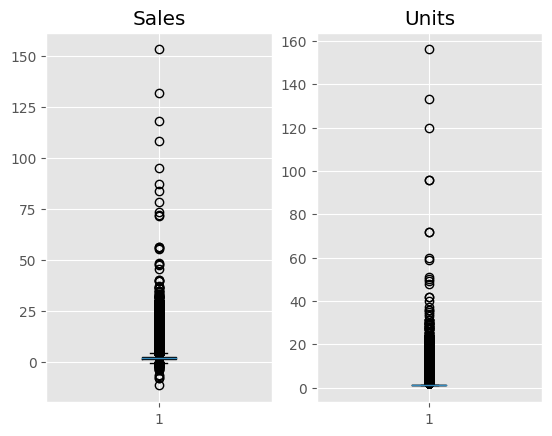

In [9]:
plt.subplot(1,2,1)
plt.boxplot(df['dollar_sales'])
plt.title('Sales')

plt.subplot(1,2,2)
plt.boxplot(df['units'])
plt.title('Units')
plt.show()

In [10]:
# remove outliner
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.0003) # mean-3sd
    q_hi  = df[column_name].quantile(0.9997) # mean+3sd
    df_filtered = df[(df[column_name] <= q_hi) & (df[column_name] >= q_low)]
    return df_filtered

df =  filter_outliner(df, 'units')
# before removed 5,197,681 row
# after removed 5,184,441 row

# remove sale <= 0
df = df[df['dollar_sales']>0]
df.head(3)

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,store_zip_code,product_description,commodity,brand,product_size
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
1,7680850106,1.60,2,1518,2,1,503106,244,5111,4,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ
2,7680850106,1.19,1,1517,2,4,18851,244,43533,23,0,40222,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ


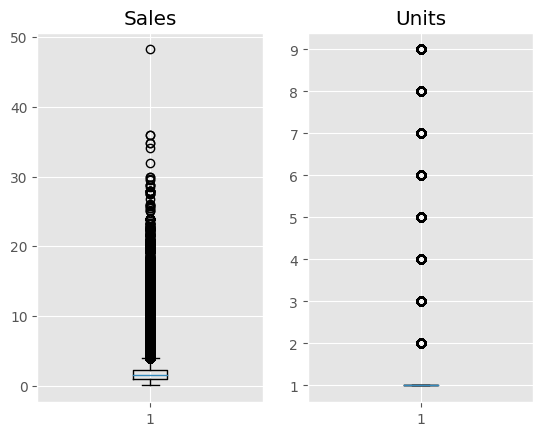

In [11]:
plt.subplot(1,2,1)
plt.boxplot(df['dollar_sales'])
plt.title('Sales')

plt.subplot(1,2,2)
plt.boxplot(df['units'])
plt.title('Units')
plt.show()

In [12]:
# extract hour from time_of_transaction
df['hour'] = df['time_of_transaction'].str[:-2].replace({'': '0'}).apply('int64')

## Q1: RFM

In [13]:
# Calculating Recency
df_recency = df.groupby(by='household', as_index=False)['day'].max()
df_recency.columns = ['cust_id', 'last_purchase_date']
recent_date = df_recency['last_purchase_date'].max()
df_recency['recency'] = df_recency['last_purchase_date'].apply(lambda x: recent_date - x)

# Calculating Frequency
frequency_df = df.groupby(by=['household', 'basket'], as_index=False)['day'].count()
frequency_df = frequency_df.groupby('household', as_index=False)['day'].count()
frequency_df.columns = ['cust_id', 'frequency']

# Calculating Monetary Value
monetary_df = df.groupby(by='household', as_index=False)['dollar_sales'].sum()
monetary_df.columns = ['cust_id', 'monetary']

# Merge
rf_df = df_recency.merge(frequency_df, on='cust_id')
rfm_df = rf_df.merge(monetary_df, on='cust_id').drop(columns='last_purchase_date')
rfm_df.head(3)

,cust_id,recency,frequency,monetary
0,1,0,11,23.00
1,10,300,5,12.63
2,100,98,1,2.99


In [14]:
rfm_df['R_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head(3)

,cust_id,recency,frequency,monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,0,11,23.00,100.000000,82.538593,82.538593
1,10,300,5,12.63,30.417588,63.499636,63.499636
2,100,98,1,2.99,60.424717,15.040804,15.040804


Formula used for calculating rfm score 
- (0.15 * Recency score) + (0.28 * Frequency score) + (0.57 * Monetary score)

In [15]:
rfm_df['RFM_Score'] = 0.15 * rfm_df['R_rank_norm']+0.28 * rfm_df['F_rank_norm']+0.57 * rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['cust_id', 'RFM_Score']].head(3)

,cust_id,RFM_Score
0,1,4.26
1,10,2.93
2,100,1.09


Rating Customer based upon the RFM score
- rfm score >4.5 : Top Customer
- 4.5 > rfm score > 4 : High Value Customer
- 4>rfm score >3 : Medium value customer
- 3>rfm score>1.6 : Low-value customer
- rfm score<1.6 :Lost Customer

In [16]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, 'Top Customers',
                              (np.where(rfm_df['RFM_Score'] > 4, 'High value Customer',
                              (np.where(rfm_df['RFM_Score'] > 3, 'Medium Value Customer',
                              (np.where(rfm_df['RFM_Score'] > 1.6, 'Low Value Customers', 'Lost Customers')))))))

rfm_result = rfm_df[['cust_id', 'RFM_Score', 'Customer_segment']]
rfm_result.head(3)

,cust_id,RFM_Score,Customer_segment
0,1,4.26,High value Customer
1,10,2.93,Low Value Customers
2,100,1.09,Lost Customers


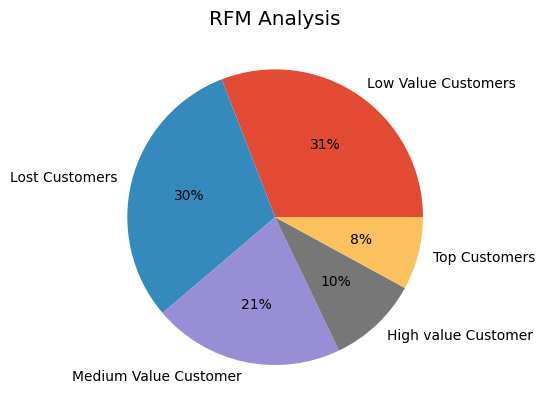

In [17]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.title('RFM Analysis')
plt.show()

## Q2: Basket Analysis

In [18]:
basket = df.groupby(['basket', 'commodity'])['units'].sum().unstack().reset_index().fillna(0).set_index('basket')

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_encode = basket.applymap(encode_units)

basket_filter = basket_encode[(basket_encode > 0).sum(axis=1)>=2]

from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(basket_filter, min_support=0.05, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
display(frequent_itemsets)

,support,itemsets,length
0,0.875960,(pasta),1
1,0.856892,(pasta sauce),1
2,0.810428,"(pasta sauce, pasta)",2
3,0.223152,(syrups),1
4,0.142838,(pancake mixes),1
5,0.108465,"(pasta, syrups)",2
6,0.106617,"(pancake mixes, syrups)",2
7,0.093382,"(pasta sauce, syrups)",2
8,0.056271,"(pasta sauce, pasta, syrups)",3


In [19]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(pancake mixes),(syrups),0.142838,0.223152,0.106617,0.746423,3.344913,0.074743,3.063562
1,(syrups),(pancake mixes),0.223152,0.142838,0.106617,0.477780,3.344913,0.074743,1.641381
2,(pasta sauce),(pasta),0.856892,0.875960,0.810428,0.945776,1.079702,0.059825,2.287548
3,(pasta),(pasta sauce),0.875960,0.856892,0.810428,0.925188,1.079702,0.059825,1.912907


## Q3: เวลาไหนที่ขายดีที่สุด ?

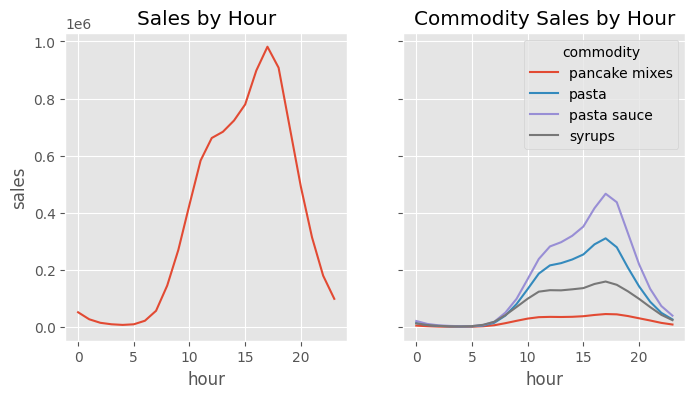

In [ ]:
hour_sumsale = df.groupby('hour')[['dollar_sales']].apply('sum').sort_values(by='hour').reset_index().rename(columns={'dollar_sales' : 'sales'})
hour_cmsales = df.groupby(['hour','commodity'])[['dollar_sales']].apply('sum').reset_index().rename(columns={'dollar_sales' : 'sales'})

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

plt.subplot(1, 2, 1)
sns.lineplot(data=hour_sumsale, x='hour', y='sales')
plt.title('Sales by Hour')

plt.subplot(1, 2, 2)
sns.lineplot(data=hour_cmsales, x='hour', y='sales', hue='commodity')
plt.title('Commodity Sales by Hour')

plt.show()

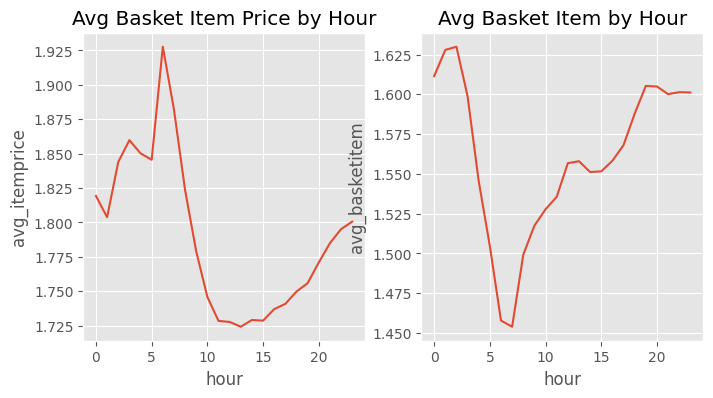

In [ ]:
hour_bktitem_avg = df.groupby(['hour','basket'])[['basket']].apply('count')
hour_bktitem_avg = hour_bktitem_avg.groupby('hour')[['basket']].apply('mean').reset_index().rename(columns={'basket' : 'avg_basketitem'})

hour_itemprice_avg = df.groupby('hour')[['dollar_sales']].apply('mean').reset_index().rename(columns={'dollar_sales' : 'avg_itemprice'})

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=hour_itemprice_avg, x='hour', y='avg_itemprice')
plt.title('Avg Basket Item Price by Hour')

plt.subplot(1, 2, 2)
sns.lineplot(data=hour_bktitem_avg, x='hour', y='avg_basketitem')
plt.title('Avg Basket Item by Hour')
plt.tight_layout()
plt.show()

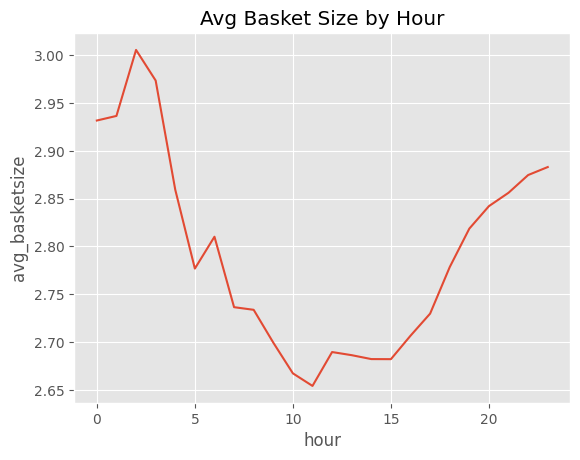

In [ ]:
hour_bktsize_avg = df.groupby(['hour','basket'])[['dollar_sales']].apply('sum').reset_index()
hour_bktsize_avg = hour_bktsize_avg.groupby('hour')[['dollar_sales']].apply('mean').reset_index().rename(columns={'dollar_sales' : 'avg_basketsize'})

sns.lineplot(data=hour_bktsize_avg, x='hour', y='avg_basketsize')
plt.title('Avg Basket Size by Hour')
plt.show()

<AxesSubplot: xlabel='hour', ylabel='avg_itemprice'>

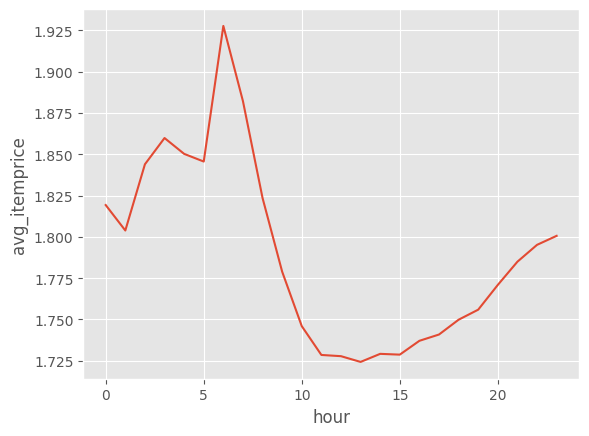

In [ ]:
hour_itemprice_avg = df.groupby('hour')[['dollar_sales']].apply('mean').reset_index().rename(columns={'dollar_sales' : 'avg_itemprice'})
sns.lineplot(data=hour_itemprice_avg, x='hour', y='avg_itemprice')

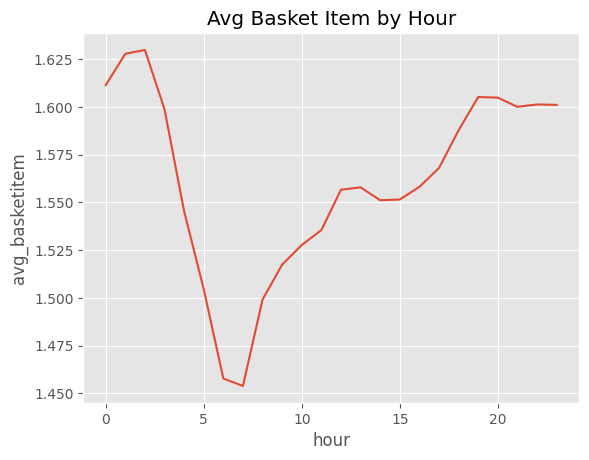

In [ ]:
hour_bktitem_avg = df.groupby(['hour','basket'])[['basket']].apply('count')
hour_bktitem_avg = hour_bktitem_avg.groupby('hour')[['basket']].apply('mean').reset_index().rename(columns={'basket' : 'avg_basketitem'})
sns.lineplot(data=hour_bktitem_avg, x='hour', y='avg_basketitem')
plt.title('Avg Basket Item by Hour')
plt.show()

## Q4: ร้านไหนที่ลูกค้าเยอะ และใช้จ่ายต่อครั้งเยอะที่สุด ?

#### Store Average Basket Size vs Average Basket Per Day

In [207]:
store_bkt_size = df.groupby(['store', 'basket'])[['dollar_sales']].apply('sum')
store_bkt_size_avg = store_bkt_size.groupby('store')[['dollar_sales']].apply('mean').rename(columns={'dollar_sales' : 'avg_bkt_size'})
store_bkt_size_avg.head(3)

,avg_bkt_size
store,
1,2.638316
10,2.513880
100,2.567124


In [208]:
store_daily_basket = df.groupby(['store', 'day'])[['basket']].nunique()
store_daily_basket_avg = store_daily_basket.groupby('store')[['basket']].apply('mean').rename(columns={'basket' : 'daily_avg_basket'})
store_daily_basket_avg.head(3)

,daily_avg_basket
store,
1,10.720386
10,12.011019
100,8.024862


In [209]:
store_geo = df[['store', 'geography']].drop_duplicates().reset_index(drop=True)
store_geo.head(3)

,store,geography
0,244,2
1,365,2
2,253,2


In [210]:
scatter_store = store_daily_basket_avg.merge(store_bkt_size_avg, left_on='store', right_on='store', how='inner')
scatter_store = scatter_store.merge(store_geo, left_on='store', right_on='store', how='inner')
scatter_store.head(3)

,store,daily_avg_basket,avg_bkt_size,geography
0,1,10.720386,2.638316,1
1,10,12.011019,2.513880,1
2,100,8.024862,2.567124,1


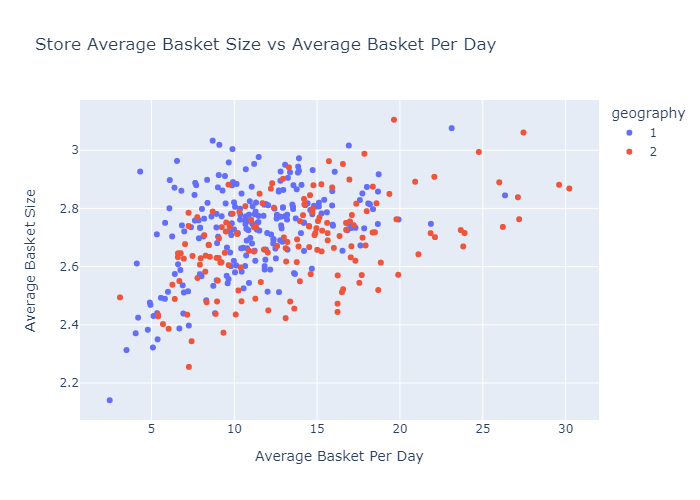

In [211]:
fig = px.scatter(scatter_store, x="daily_avg_basket", y="avg_bkt_size", hover_data=['store'], color='geography',
                labels={
                     "avg_bkt_size": "Average Basket Size",
                     "daily_avg_basket": "Average Basket Per Day"
                 },
                title="Store Average Basket Size vs Average Basket Per Day")
fig.show('png')

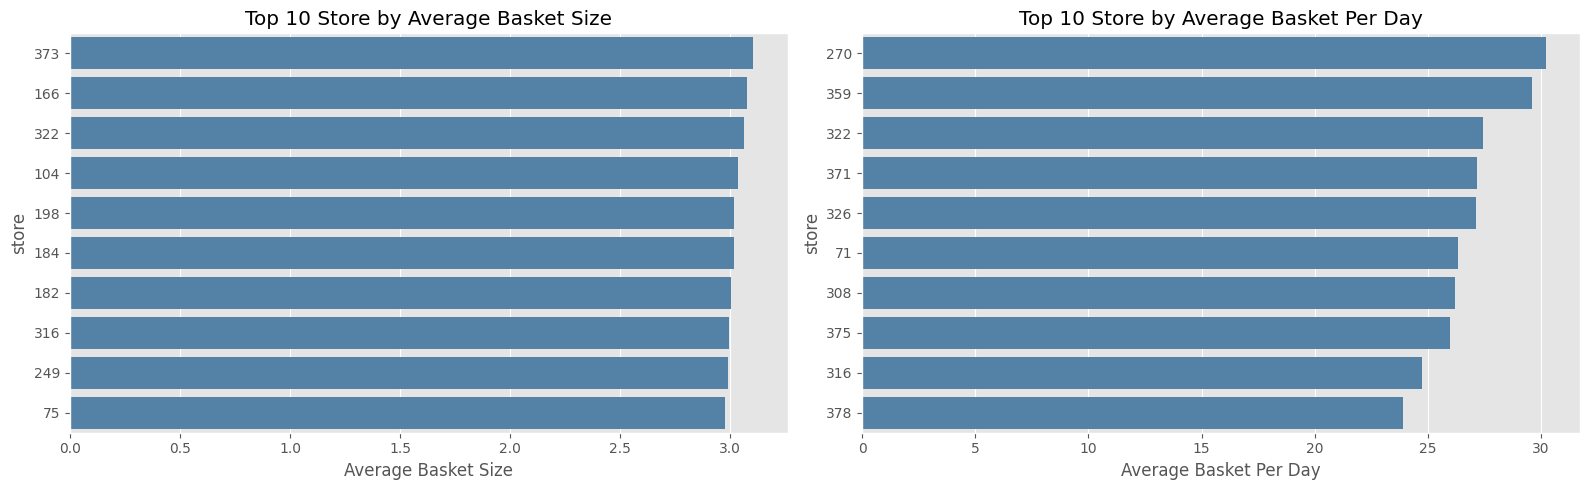

In [236]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=scatter_store.sort_values('avg_bkt_size', ascending=False).head(10), x='avg_bkt_size', y='store', color='steelblue')
plt.xlabel('Average Basket Size')
plt.title('Top 10 Store by Average Basket Size')

plt.subplot(1, 2, 2)
sns.barplot(data=scatter_store.sort_values('daily_avg_basket', ascending=False).head(10), x='daily_avg_basket', y='store', color='steelblue')
plt.xlabel('Average Basket Per Day')
plt.title('Top 10 Store by Average Basket Per Day')

plt.tight_layout()
plt.show()

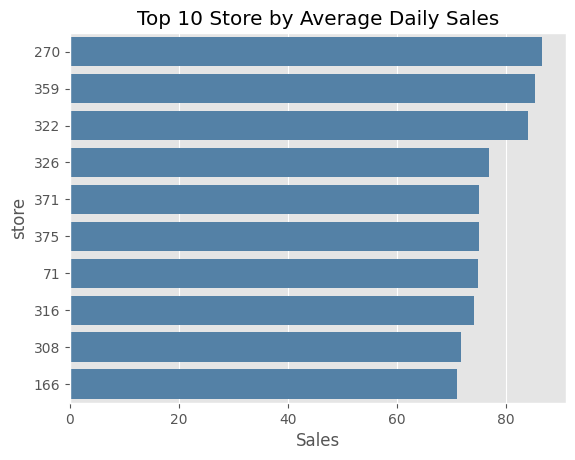

In [240]:
store_salesdaily_avg = df.groupby(['store','day'])[['dollar_sales']].apply('sum')
store_salesdaily_avg = store_salesdaily_avg.groupby('store')[['dollar_sales']].apply('mean').reset_index().rename(columns={'dollar_sales' : 'avg_daily_sales'}).sort_values('avg_daily_sales', ascending=False)

sns.barplot(data=store_salesdaily_avg.head(10), x='avg_daily_sales', y='store', color='steelblue')
plt.xlabel('Sales')
plt.title('Top 10 Store by Average Daily Sales')
plt.show()

## Q5: จะเพิ่มกำไรอย่างไรดี ?

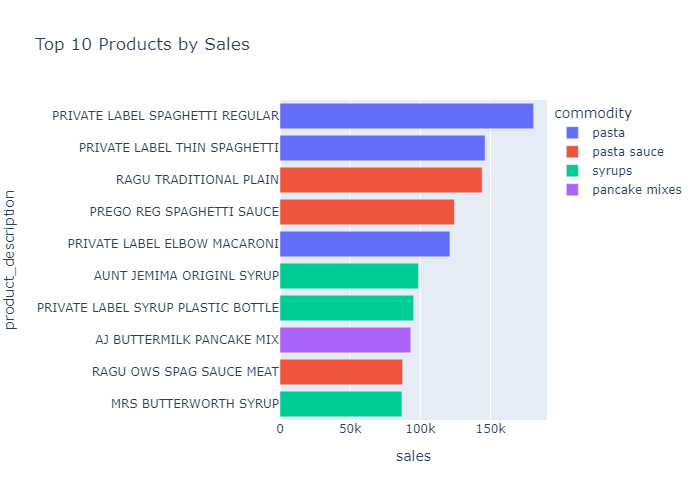

In [213]:
pd_sumsales = df.groupby(['commodity', 'product_description'])[['dollar_sales']].apply('sum').sort_values(by='dollar_sales', ascending=False).reset_index().rename(columns={'dollar_sales' : 'sales'})
# pd_count = df.groupby('product_description')[['dollar_sales']].apply('count').sort_values(by='dollar_sales', ascending=False).reset_index().rename(columns={'dollar_sales' : 'count'})
# pd_scatter = pd_sumsales.merge(pd_count, on='product_description')

# sns.scatterplot(pd_scatter, x='count', y='sales')
# plt.title('Products Sales by Number of Products Sold')
# plt.show()

fig = px.bar(pd_sumsales.head(10), x='sales', y='product_description', color="commodity", title='Top 10 Products by Sales')
fig.update_layout(yaxis_categoryorder = 'total ascending')
fig.show('png')

# product ที่ยอดขายสูงสุดส่วนใหญ่เป็น pasta รองลงมา pasta sauce

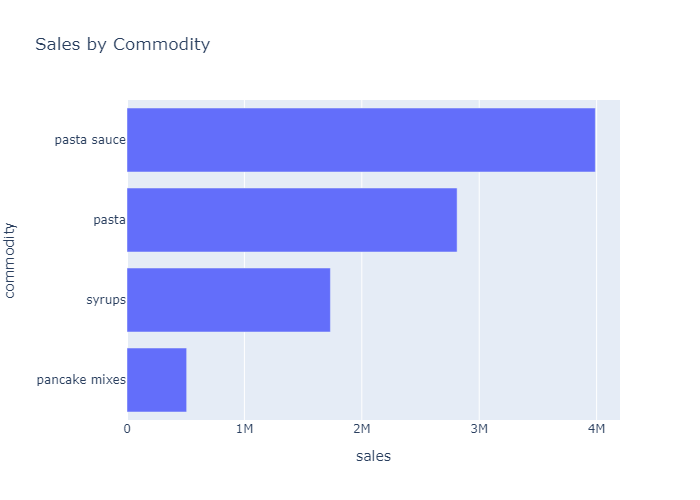

In [214]:
# แต่ถ้าดูรวมๆ pasta sauce สร้างยอดขายได้เยอะสุด
cm_sumsales = df.groupby('commodity')[['dollar_sales']].apply('sum').sort_values(by='dollar_sales', ascending=False).reset_index().rename(columns={'dollar_sales' : 'sales'})

fig = px.bar(cm_sumsales.head(10), x='sales', y='commodity', title='Sales by Commodity')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show('png')

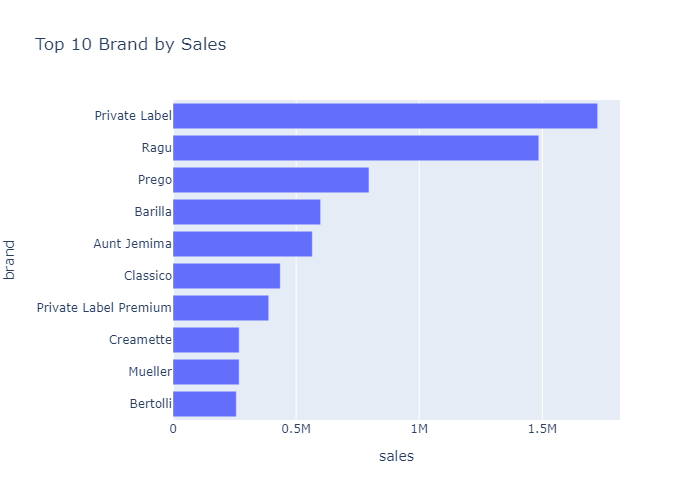

In [215]:
# brand ที่ได้ยอดขายสูงสุดเป็น private label
brand_sumsales = df.groupby('brand')[['dollar_sales']].apply('sum').sort_values(by='dollar_sales', ascending=False).reset_index().rename(columns={'dollar_sales' : 'sales'})

fig = px.bar(brand_sumsales.head(10), x='sales', y='brand', title='Top 10 Brand by Sales')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show('png')

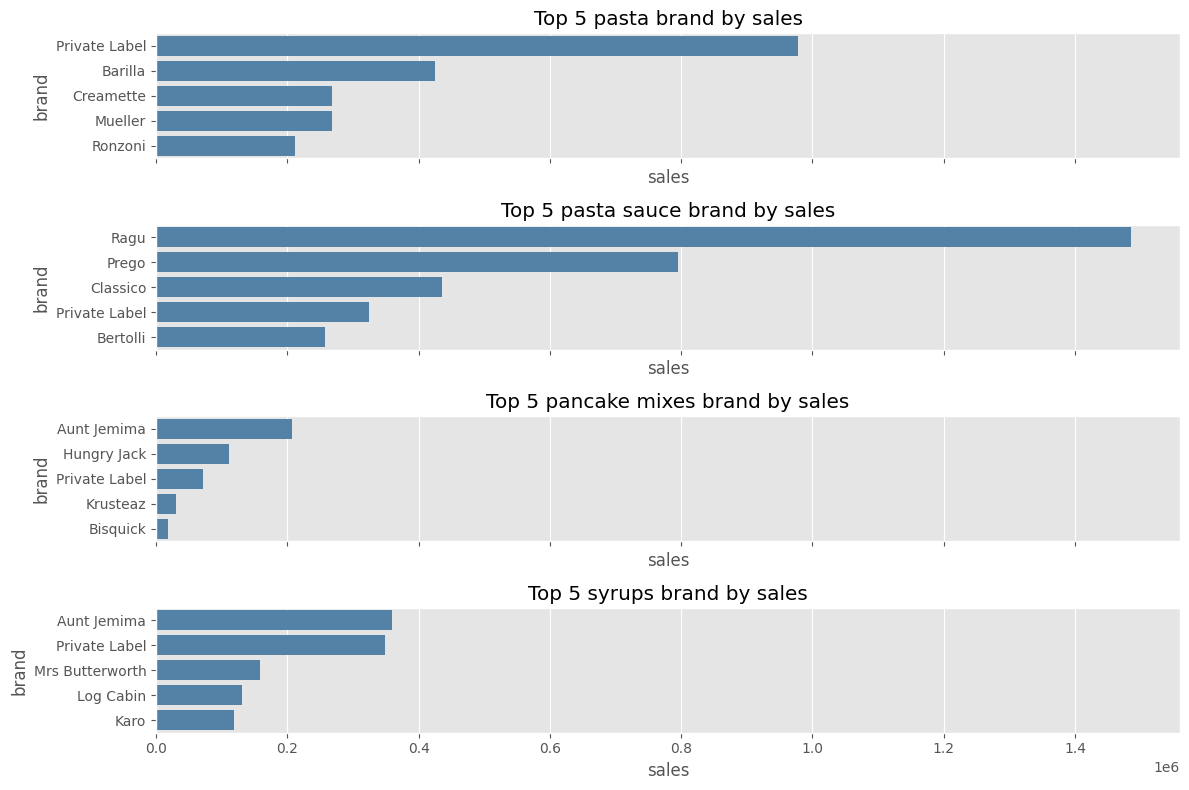

In [216]:
# private label ขาย pasta ได้เยอะแต่ pasta sauce น้อย ส่วน pancake และ syrups ก็ไม่เป็นที่ 1
brand_sumsales = df.groupby(['brand', 'commodity'])[['dollar_sales']].apply('sum').sort_values(by='dollar_sales', ascending=False).reset_index().rename(columns={'dollar_sales' : 'sales'})
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
for num, i in enumerate(list(df['commodity'].unique())):
    plt.subplot(4, 1, num+1)
    sns.barplot(data=brand_sumsales[brand_sumsales['commodity']==i].head(5), x='sales', y='brand', color='steelblue')
    plt.title(f'Top 5 {i} brand by sales')
plt.tight_layout()
plt.show()

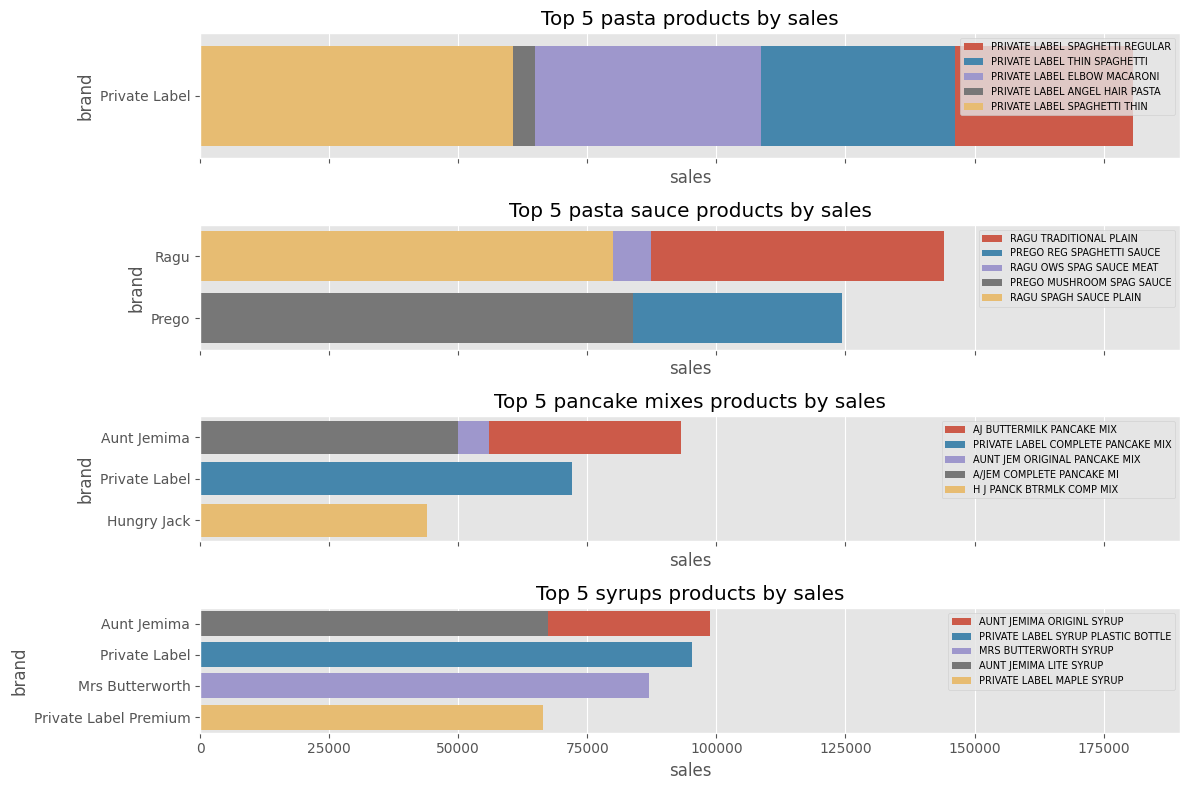

In [217]:
# ถ้าดูสินค้าที่ยอดขายสูงสุดของแต่ละ category 5 อันดับ private label ชนะขาดแค่ pasta ส่วนอันอื่นโดนแซงหมดแทบไม่ติดอันดับเลย
pd_sumsales = df.groupby(['product_description', 'commodity', 'brand'])[['dollar_sales']].apply('sum').sort_values(by='dollar_sales', ascending=False).reset_index().rename(columns={'dollar_sales' : 'sales'})
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
for num, i in enumerate(list(df['commodity'].unique())):
    plt.subplot(4, 1, num+1)
    sns.barplot(data=pd_sumsales[pd_sumsales['commodity']==i].head(), x='sales', y='brand', hue='product_description', dodge=False)
    plt.title(f'Top 5 {i} products by sales')
    plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

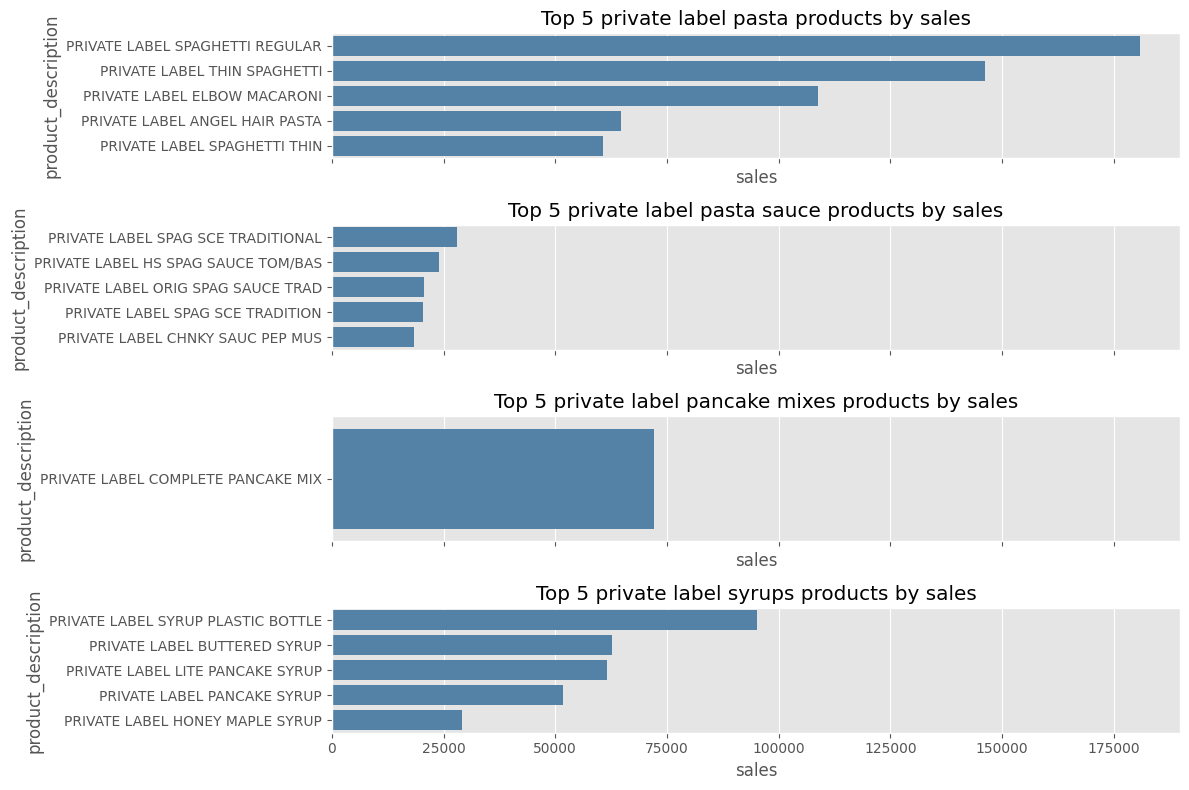

In [218]:
# assumption ว่ามีสินค้าน้อยไปไม่หลากหลายพอมา filter ดูสินค้ามีเยอะแต่ไม่เป็นที่นิยม อาจจะไม่อร่อยหรือคนไม่เคยลอง
fig, axs = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
for num, i in enumerate(list(df['commodity'].unique())):
    plt.subplot(4, 1, num+1)
    sns.barplot(data=pd_sumsales[(pd_sumsales['commodity']==i) & (pd_sumsales['brand']=='Private Label')].head(), x='sales', y='product_description', color='steelblue')
    plt.title(f'Top 5 private label {i} products by sales')
plt.tight_layout()
plt.show()

## Time

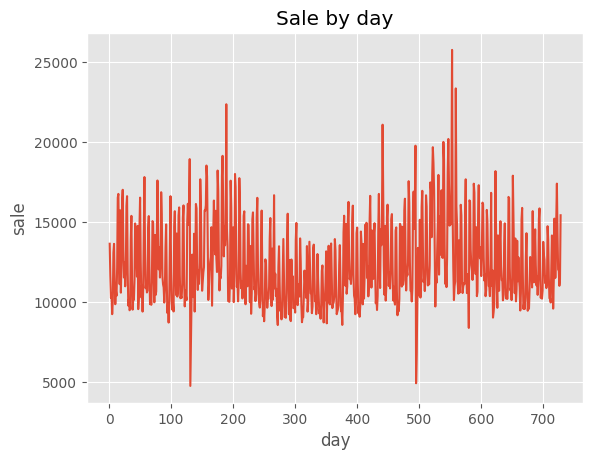

In [219]:
day_sumsale = df.groupby('day')[['dollar_sales']].apply('sum').sort_values(by='day').reset_index().rename(columns={'dollar_sales' : 'sale'})

sns.lineplot(data=day_sumsale, x='day', y='sale')
plt.title('Sale by day')
plt.show()

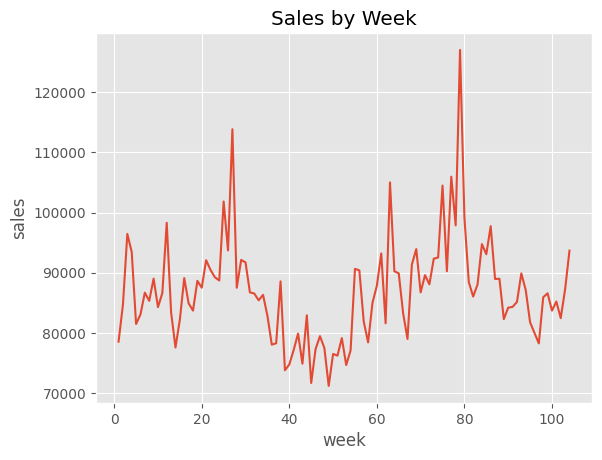

In [220]:
week_sumsale = df.groupby('week')[['dollar_sales']].apply('sum').sort_values(by='week').reset_index().rename(columns={'dollar_sales' : 'sales'})

sns.lineplot(data=week_sumsale, x='week', y='sales')
plt.title('Sales by Week')
plt.show()

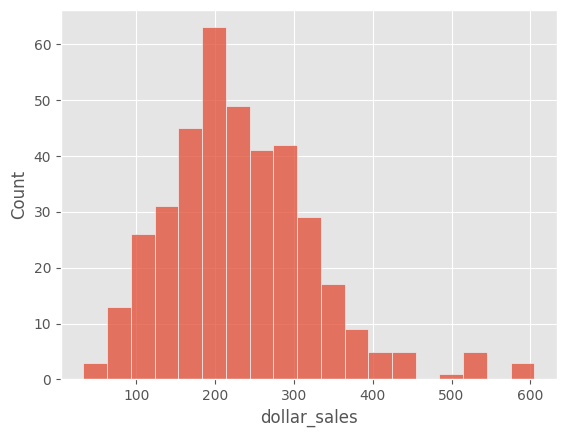

In [221]:
store_sales_week = df.groupby(['store', 'week'])[['dollar_sales']].apply('sum')
store_sales_week_avg = store_sales_week.groupby('store')[['dollar_sales']].apply('mean').sort_values('dollar_sales', ascending=False).reset_index()
sns.histplot(data=store_sales_week_avg, x='dollar_sales')
plt.show()

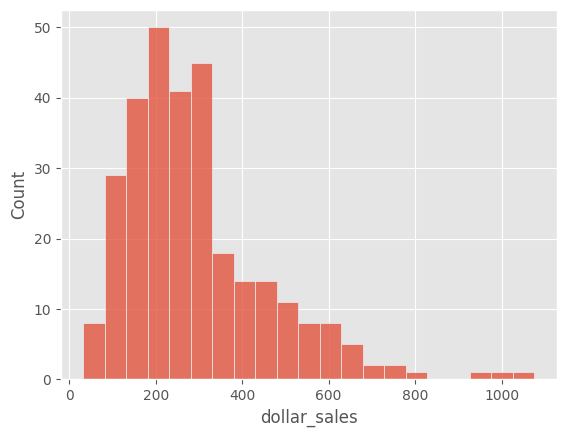

In [222]:
zip_sales_week = df.groupby(['store_zip_code', 'week'])[['dollar_sales']].apply('sum')
zip_sales_week_avg = zip_sales_week.groupby('store_zip_code')[['dollar_sales']].apply('mean').sort_values('dollar_sales', ascending=False).reset_index()
sns.histplot(data=zip_sales_week_avg, x='dollar_sales')
plt.show()